In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/eda.csv')

print(f"Shape of table/dataframe: ")
print(f"\n{df.shape[0]} houses, {df.shape[1]} columns")

Shape of table/dataframe: 

21597 houses, 23 columns


In [3]:
# first 5 rows...
df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520,1
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400,3
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5


In [4]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

Check for categoricals:
(Arbitrary threshold < 30 non-NA values)

<Axes: xlabel='Variables'>

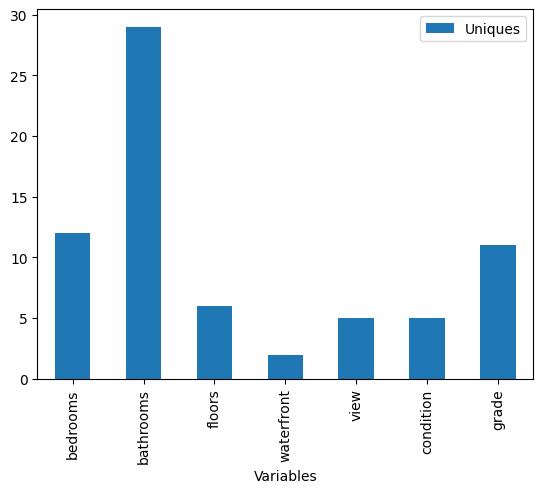

In [5]:
df_info=pd.DataFrame(
    {'Variables': df.columns,
     'Uniques':[df[c].nunique() for c in df.columns],
     'Types':[df[c].dtype for c in df.columns],
    'categorical': [df[c].dropna().nunique() < 30 for c in df.columns]
    }
)

df_categ=df_info[df_info["categorical"]==True].drop("categorical",axis=1)

df_categ[["Variables","Uniques"]].plot(kind="bar",x="Variables")


In [6]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [7]:

# statistics
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,21597.000000,...,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,2.159700e+04,21597.000000
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,7.657915,...,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,5.402966e+05,4.580474e+09,10799.000000
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,1.173200,...,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05,2.876736e+09,6234.661218
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04,1.000102e+06,1.000000
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05,2.123049e+09,5400.000000
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05,3.904930e+09,10799.000000
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05,7.308900e+09,16198.000000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,9.900000e+09,21597.000000


---
## 2. Data Cleaning

### 2.1 Missing Values

In [8]:
# missings statistics:

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100)

missing_df = pd.DataFrame({
    'Missing': missing,
    'Prozent': missing_pct
})

# columns with missings:
missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)

,Missing,Prozent
yr_renovated,3848,17.817289
waterfront,2391,11.070982
sqft_basement,452,2.092883
view,63,0.291707


In [34]:
# "Missings" & "Zero" statistics:

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100)
zeros=(df==0).sum()
zeros_pct = (zeros / len(df) * 100)
missing_df = pd.DataFrame({
    'Missing': missing,
    'Missing %': missing_pct

})
zero_df = pd.DataFrame({
    'Zero':zeros,
    'Zero %': zeros_pct  
})
# columns with missings:
print(missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False))
print(f"\n{zero_df[zero_df['Zero'] > 0].sort_values('Zero',ascending=False)}")

               Missing  Missing %
yr_renovated      3848  17.817289
waterfront        2391  11.070982
sqft_basement      452   2.092883
view                63   0.291707

                Zero     Zero %
view           19422  89.929157
waterfront     19060  88.252998
yr_renovated   17005  78.737788
sqft_basement  12827  59.392508


### 2.2 Duplicates/Triplicates?

In [10]:
# same house sold more than once?
print(f"Duplicates (house_id): {df.duplicated(subset=['house_id']).sum()}")

df['house_id'].value_counts()[lambda x: x > 1].max()


Duplicates (house_id): 177


np.int64(3)

In [11]:
# Beispiel: Häuser die mehrfach verkauft wurden
duplicate_houses = df[df.duplicated(subset=['house_id'], keep=False)].sort_values('house_id')
print(f"Anzahl Einträge von mehrfach verkauften Häusern: {len(duplicate_houses)}")
duplicate_houses[['house_id', 'date', 'price', 'bedrooms', 'sqft_living']].head(10)

Anzahl Einträge von mehrfach verkauften Häusern: 353


,house_id,date,price,bedrooms,sqft_living
2494,1000102,2014-09-16,280000.0,6.0,2400.0
2495,1000102,2015-04-22,300000.0,6.0,2400.0
16800,7200179,2014-10-16,150000.0,2.0,840.0
16801,7200179,2015-04-24,175000.0,2.0,840.0
11421,109200390,2014-08-20,245000.0,3.0,1480.0
11422,109200390,2014-10-20,250000.0,3.0,1480.0
12405,123039336,2014-06-11,148000.0,1.0,620.0
12406,123039336,2014-12-08,244900.0,1.0,620.0
7785,251300110,2014-07-31,225000.0,3.0,2510.0
7786,251300110,2015-01-14,358000.0,3.0,2510.0


### 2.3 Unlogische/Fehlerhafte Werte identifizieren

In [36]:
# Bedrooms: extreme values?

print(df['bedrooms'].value_counts().sort_index())
print(f"\nMin: {df['bedrooms'].min()}, Max: {df['bedrooms'].max()}")

bedrooms
1.0      196
2.0     2760
3.0     9824
4.0     6882
5.0     1601
6.0      272
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: count, dtype: int64

Min: 1.0, Max: 33.0


In [13]:
# 33 Bedrooms?
df[df['bedrooms'] > 11][['bedrooms', 'bathrooms', 'sqft_living', 'price']]

,bedrooms,bathrooms,sqft_living,price
15856,33.0,1.75,1620.0,640000.0


In [ ]:
# Bathrooms Check (should be >0)

print(f"Min: {df['bathrooms'].min()}, Max: {df['bathrooms'].max()}")


=== BATHROOMS ===
Min: 0.5, Max: 8.0

0 Bathrooms: 0 Häuser


In [15]:
# sqft_living = 0? 
print("=== SQFT_LIVING ===")
print(f"Min: {df['sqft_living'].min()}, Max: {df['sqft_living'].max()}")
print(f"\n0 sqft: {(df['sqft_living'] == 0).sum()} Häuser")

=== SQFT_LIVING ===
Min: 370.0, Max: 13540.0

0 sqft: 0 Häuser


In [35]:
# yr_renovated: Werte prüfen (sollte 0 oder Jahr sein)
print("=== YR_RENOVATED ===")
print(df['yr_renovated'].describe())
print(f"\nUnique values (erste 20): {sorted(df['yr_renovated'].dropna().unique())}")

=== YR_RENOVATED ===
count    17749.000000
mean       836.650516
std       4000.110554
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20150.000000
Name: yr_renovated, dtype: float64

Unique values (erste 20): [np.float64(0.0), np.float64(19340.0), np.float64(19400.0), np.float64(19440.0), np.float64(19450.0), np.float64(19460.0), np.float64(19480.0), np.float64(19500.0), np.float64(19510.0), np.float64(19530.0), np.float64(19540.0), np.float64(19550.0), np.float64(19560.0), np.float64(19570.0), np.float64(19580.0), np.float64(19590.0), np.float64(19600.0), np.float64(19620.0), np.float64(19630.0), np.float64(19640.0), np.float64(19650.0), np.float64(19670.0), np.float64(19680.0), np.float64(19690.0), np.float64(19700.0), np.float64(19710.0), np.float64(19720.0), np.float64(19730.0), np.float64(19740.0), np.float64(19750.0), np.float64(19760.0), np.float64(19770.0), np.float64(19780.0), np.float64(19790.0), np.float64(19800.0), np.float6

In [38]:
# cleaning yr_renovated years:
df['yr_renovated_clean'] = df['yr_renovated'] / 10
df['yr_renovated_clean']

0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated_clean, Length: 21597, dtype: float64

In [18]:
df['yr_renovated'].min()

np.float64(0.0)

### 2.4 Visualisierung: Boxplots für Outlier-Erkennung

<Axes: title={'center': 'Price Distribution'}>

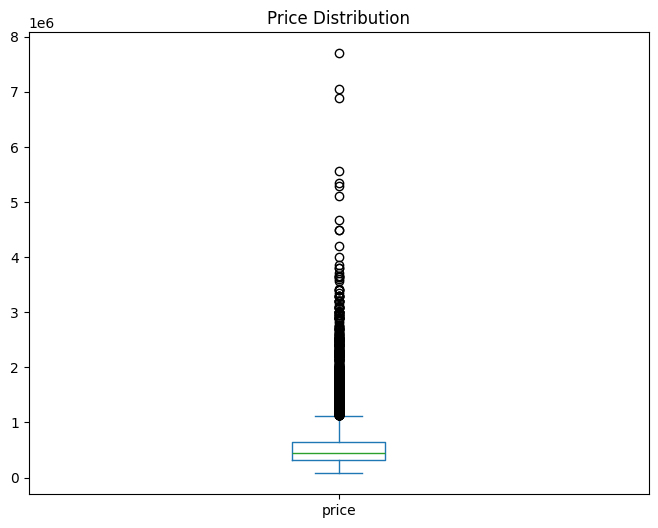

In [19]:
# Boxplot Price
df[['price']].plot(kind='box', title='Price Distribution', figsize=(8, 6))

<Axes: title={'center': 'Bedrooms Distribution'}>

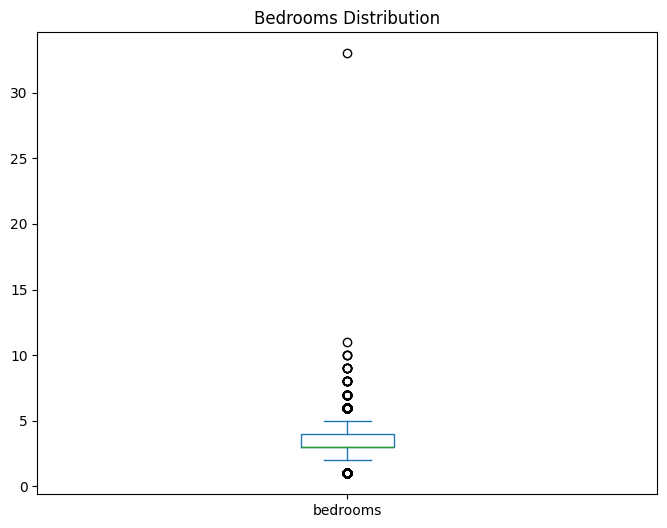

In [20]:
# Boxplot Bedrooms
df[['bedrooms']].plot(kind='box', title='Bedrooms Distribution', figsize=(8, 6))

<Axes: title={'center': 'Sqft Living Distribution'}>

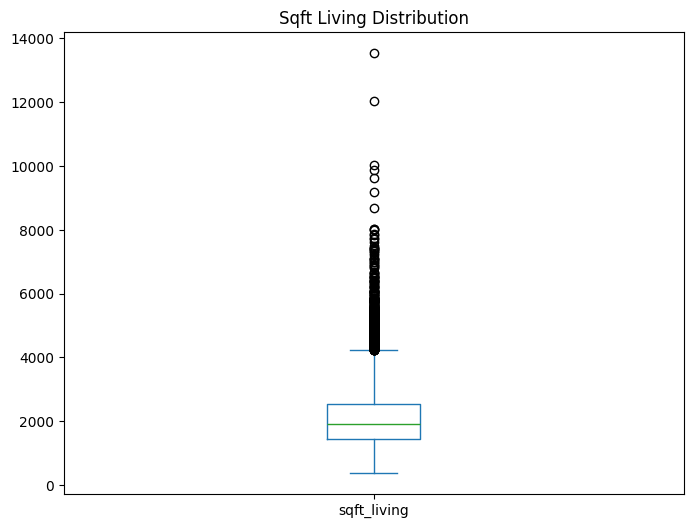

In [21]:
# Boxplot sqft_living
df[['sqft_living']].plot(kind='box', title='Sqft Living Distribution', figsize=(8, 6))

<Axes: title={'center': 'Price Histogram'}, ylabel='Frequency'>

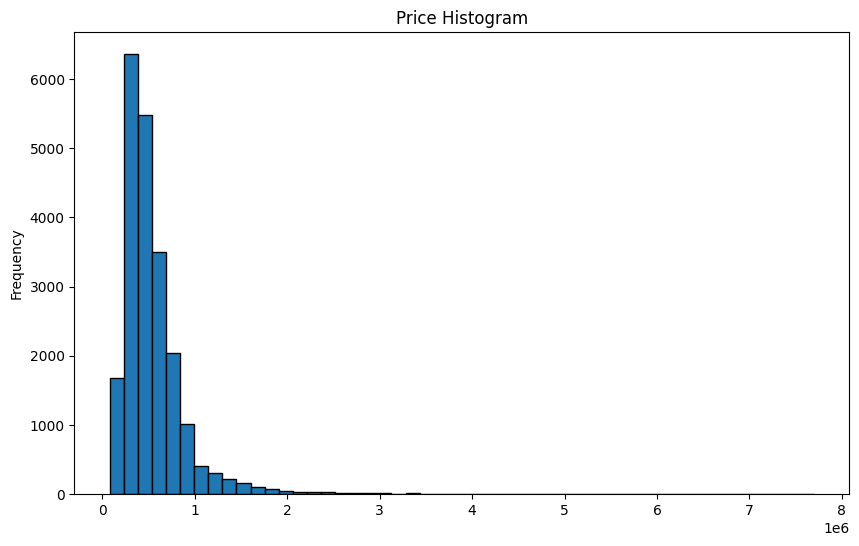

In [22]:
# Histogram für Price
df['price'].plot(kind='hist', bins=50, title='Price Histogram', figsize=(10, 6), edgecolor='black')

---
## 3. Data Cleaning

### Übersicht der Probleme und Lösungen:


 `bedrooms`: Outlier (33 bedrooms)  -> 0 serves as missing

 `bathrooms`: 0 bathrooms -> 0 serves as missng 

 `waterfront`:  11% missing -> keine "waterfront" -> 0 

 `view`:  0.3% missing  -> 0 

 `sqft_basement`  2% missing  -> Assumption: no basement -> 0 

 `yr_renovated`  18% missing -> 0 (no renovation) 
 
 `date`  String instead Datetime -> conversion 

In [23]:
# copy
df_clean = df.copy()
df_clean.head()


# drop id's except house_id
df_clean = df_clean.drop(columns=['id.1','id'])
pd.DataFrame({
    'example':df_clean.head(1).T.iloc[:,0],
    'types': df_clean.dtypes
})


,example,types
bedrooms,3.0,float64
bathrooms,1.0,float64
sqft_living,1180.0,float64
sqft_lot,5650.0,float64
floors,1.0,float64
waterfront,NaN,float64
view,0.0,float64
condition,3,int64
grade,7,int64
sqft_above,1180.0,float64


In [24]:
# 2. Date conversion to DateTime
df_clean['date'] = pd.to_datetime(df_clean['date'])

# ... also to month, year
df_clean['month'] = df_clean['date'].dt.month
df_clean['year'] = df_clean['date'].dt.year


print(f" Date from: {df_clean['date'].min()} to {df_clean['date'].max()}")

print(f" Date from: {df_clean['month'].min()} to {df_clean['month'].max()}")
print(f" Date from: {df_clean['year'].min()} to {df_clean['year'].max()}")

 Date from: 2014-05-02 00:00:00 to 2015-05-27 00:00:00
 Date from: 1 to 12
 Date from: 2014 to 2015


In [25]:
# 3. Bedrooms Outlier:
print(f"Bedrooms > 11: {(df_clean['bedrooms'] > 11).sum()}")

# 1 house: 33 -> drop
df_clean = df_clean[df_clean['bedrooms'] <= 11]



Bedrooms > 11: 1


In [26]:
# 4. Waterfront: NaN -> 0
df_clean['waterfront'] = df_clean['waterfront'].fillna(0)


In [27]:
# 5. View: NaN -> 0
df_clean['view'] = df_clean['view'].fillna(0)


In [28]:
# 6. sqft_basement: NaN -< 0
df_clean['sqft_basement'] = df_clean['sqft_basement'].fillna(0)


In [29]:
# 7. yr_renovated: NaN → 0
df_clean['yr_renovated'] = df_clean['yr_renovated'].fillna(0)



In [30]:
# Final Missing Values Check
#print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])
df_clean.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
house_id         0
month            0
year             0
dtype: int64

<Axes: ylabel='Frequency'>

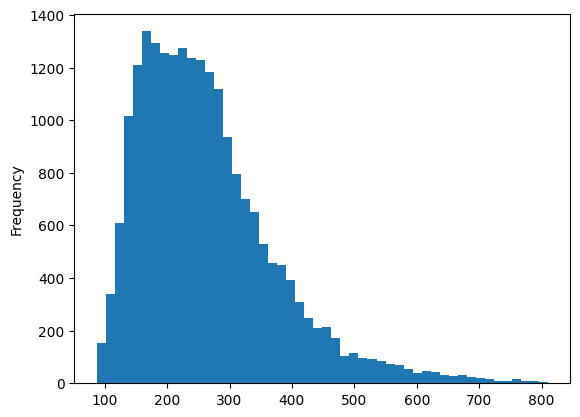

In [31]:
# price per sqft:
df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft_living']

df_clean['price_per_sqft'].plot(kind="hist",bins=50)

In [32]:
# Finaler Datensatz Übersicht
print(f"Shape nach Cleaning: {df_clean.shape}")
df_clean.info()

Shape nach Cleaning: (21596, 24)
<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   bedrooms        21596 non-null  float64       
 1   bathrooms       21596 non-null  float64       
 2   sqft_living     21596 non-null  float64       
 3   sqft_lot        21596 non-null  float64       
 4   floors          21596 non-null  float64       
 5   waterfront      21596 non-null  float64       
 6   view            21596 non-null  float64       
 7   condition       21596 non-null  int64         
 8   grade           21596 non-null  int64         
 9   sqft_above      21596 non-null  float64       
 10  sqft_basement   21596 non-null  float64       
 11  yr_built        21596 non-null  int64         
 12  yr_renovated    21596 non-null  float64       
 13  zipcode         21596 non-null  int64         
 14  lat             21596 non-

---
## 4. Client selection: Bonnie Brown (Seller)
** WHY? **
1. Seller Analysis is simpler 
2. Middle-Class = Median area IQR (25-75%)
3. clear questions: Timing + Neighborhood + Profit


In [41]:
# columns for Bonnie Brown Analyse
bonnie_cols = ['price', 'zipcode', 'date', 'month', 'grade', 'condition', 
               'sqft_living', 'bedrooms', 'bathrooms', 'yr_built', 
               'price_per_sqft', 'lat', 'long']

df_bonnie = df_clean[bonnie_cols].copy()
print(f"Bonnie Brown Dataset: {df_bonnie.shape}")
df_bonnie.head()

Bonnie Brown Dataset: (21596, 13)


,price,zipcode,date,month,grade,condition,sqft_living,bedrooms,bathrooms,yr_built,price_per_sqft,lat,long
0,221900.0,98178,2014-10-13,10,7,3,1180.0,3.0,1.00,1955,188.050847,47.5112,-122.257
1,538000.0,98125,2014-12-09,12,7,3,2570.0,3.0,2.25,1951,209.338521,47.7210,-122.319
2,180000.0,98028,2015-02-25,2,6,3,770.0,2.0,1.00,1933,233.766234,47.7379,-122.233
3,604000.0,98136,2014-12-09,12,7,5,1960.0,4.0,3.00,1965,308.163265,47.5208,-122.393
4,510000.0,98074,2015-02-18,2,8,3,1680.0,3.0,2.00,1987,303.571429,47.6168,-122.045


### 4.2 Middle-Class Definition

Middle-Class = mid-price segment (25. bis 75. percentile)

In [43]:

q25 = df_clean['price'].quantile(0.25)
q75 = df_clean['price'].quantile(0.75)

print(f"Middle-Class range: ${q25} - ${q75}")
print(f"Median: ${df_clean['price'].median()}")

Middle-Class range: $322000.0 - $645000.0
Median: $450000.0


In [44]:
# Middle-Class filters
df_middle = df_clean[(df_clean['price'] >= q25) & (df_clean['price'] <= q75)].copy()
print(f"Middle-Class : {len(df_middle)} ({len(df_middle)/len(df_clean)*100:.1f}%)")

Middle-Class : 10831 (50.2%)


---
## 5.   Timing to sell - assumption: monthly basis
### when is best / worst time to sell

In [60]:
# avg price per month
monthly_price = df_middle.groupby('month')['price'].agg(['mean', 'median', 'count'])
monthly_price.columns = ['AVG', 'Median', 'Count']
monthly_price['AVG'] = monthly_price['AVG'].round(0)
monthly_price['Median'] = monthly_price['Median'].round(0)
monthly_price

,AVG,Median,Count
month,,,
1,458212.0,453000.0,471
2,461948.0,445000.0,653
3,462148.0,450000.0,905
4,465497.0,456200.0,1141
5,465014.0,456500.0,1251
6,463916.0,454000.0,1070
7,467855.0,459750.0,1098
8,456289.0,443036.0,984
9,462646.0,450000.0,926


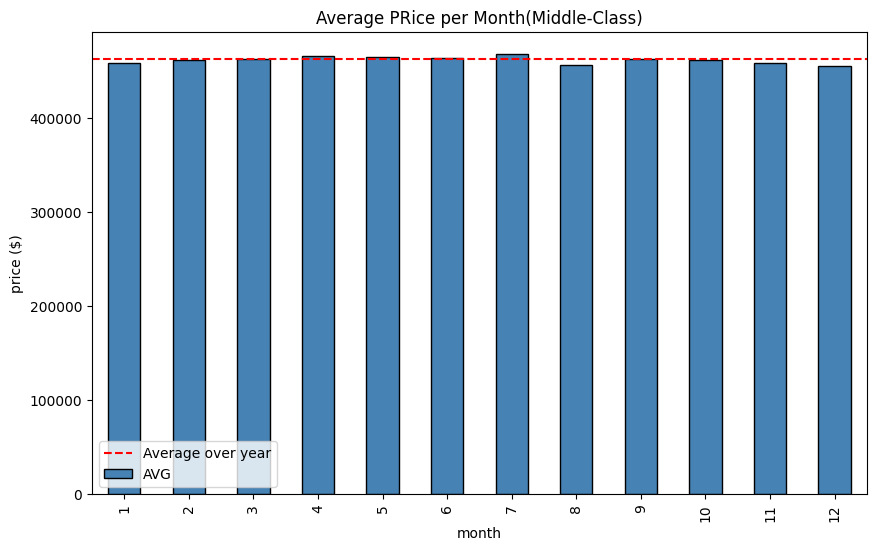

In [61]:
# visualization
ax = monthly_price['AVG'].plot(kind='bar', title='Average PRice per Month(Middle-Class)', 
                                    figsize=(10, 6), color='steelblue', edgecolor='black')
ax.axhline(y=df_middle['price'].mean(), color='red', linestyle='--', label='Average over year')
ax.set_ylabel('price ($)')
ax.set_xlabel('month')
ax.legend()

In [70]:
# best / worst Months
best_month = monthly_price['AVG'].idxmax()
worst_month = monthly_price['AVG'].idxmin()
diff = monthly_price.loc[best_month, 'AVG'] - monthly_price.loc[worst_month, 'AVG']
diff_pct = diff / monthly_price.loc[worst_month, 'AVG'] * 100

print(f"best: {best_month} (${monthly_price.loc[best_month, 'AVG']:,.0f})")
print(f"worst: {worst_month} (${monthly_price.loc[worst_month, 'AVG']:,.0f})")
print(f" Difference: ${diff:,.0f} ({diff_pct:.1f}%)")

best: 7 ($467,855)
worst: 12 ($454,676)
 Difference: $13,179 (2.9%)


### neighborhoods

In [73]:
# Analyse nach Zipcode (nur Middle-Class)
zip_analysis = df_middle.groupby('zipcode').agg({
    'price': ['mean', 'median', 'count'],
    'price_per_sqft': 'mean'
}).round(0)

zip_analysis.columns = ['Avg_Price', 'Median_Price', 'Count', 'Price_per_Sqft']
zip_analysis = zip_analysis[zip_analysis['Count'] >= 0] 
zip_analysis = zip_analysis.sort_values('Avg_Price', ascending=False)

print("Top 10 Middle-Class Neighborhoods (avg):")
zip_analysis.head()

Top 10 Middle-Class Neighborhoods (avg):


,Avg_Price,Median_Price,Count,Price_per_Sqft
zipcode,,,,
98004,601528.0,617500.0,16,413.0
98040,584983.0,592213.0,16,394.0
98075,560373.0,570000.0,94,263.0
98005,557734.0,554000.0,45,317.0
98119,545801.0,572750.0,68,402.0


Text(0, 0.5, 'Zipcode')

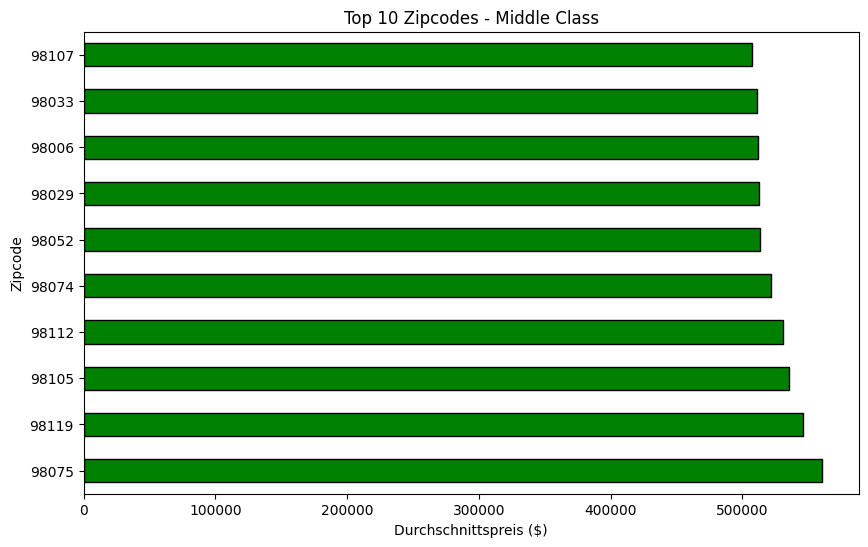

In [64]:
# Visualisierung: Top 10 Zipcodes
ax = zip_analysis.head(10)['Avg_Price'].plot(kind='barh', title='Top 10 Zipcodes - Middle Class', 
                                         figsize=(10, 6), color='green', edgecolor='black')
ax.set_xlabel('Durchschnittspreis ($)')
ax.set_ylabel('Zipcode')

<Axes: title={'center': 'geografic distribution (Middle-Class)'}, xlabel='long', ylabel='lat'>

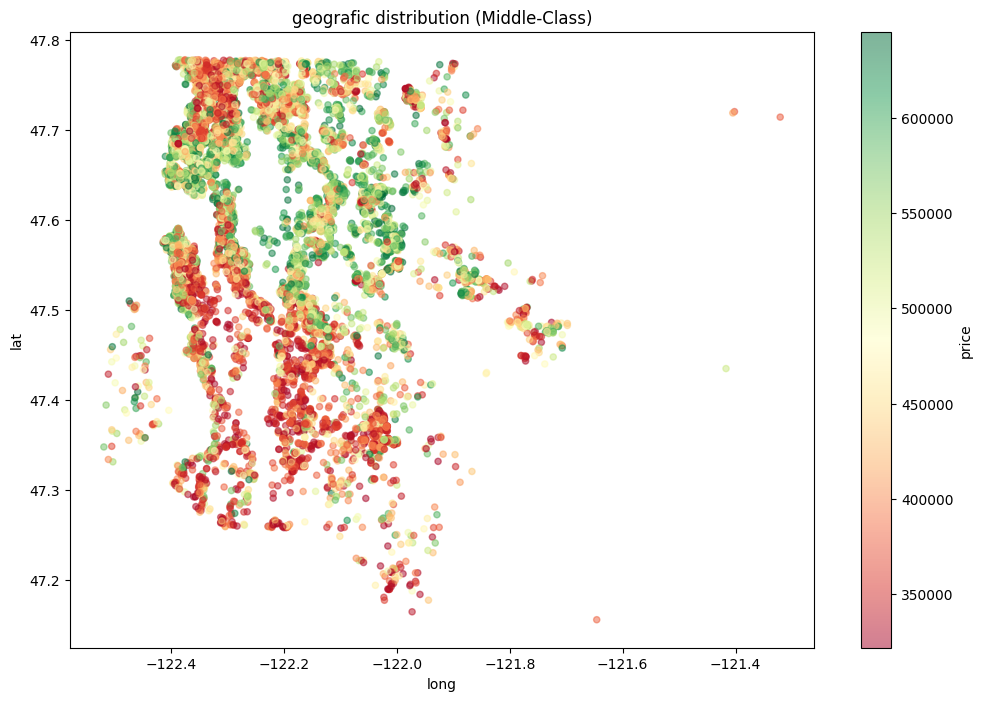

In [80]:
# Geographische Verteilung (Scatter Plot mit lat/long)
df_middle.plot(kind='scatter', x='long', y='lat', c='price', cmap='RdYlGn',
               title='geografic distribution (Middle-Class)', 
               figsize=(12, 8), alpha=0.5, colorbar=True)

### 5.3 INSIGHT 3: Grade & Condition - Was beeinflusst den Preis?

In [75]:
# Grade vs price
grade_price = df_middle.groupby('grade')['price'].agg(['mean', 'count'])
grade_price.columns = ['AVG', 'Count']
grade_price

,AVG,Count
grade,,
4,358666.666667,6
5,407447.170732,41
6,412415.347518,705
7,445330.187193,5091
8,478486.598781,3938
9,514956.112540,933
10,543231.600000,110
11,568428.571429,7


Text(0, 0.5, 'Average ($)')

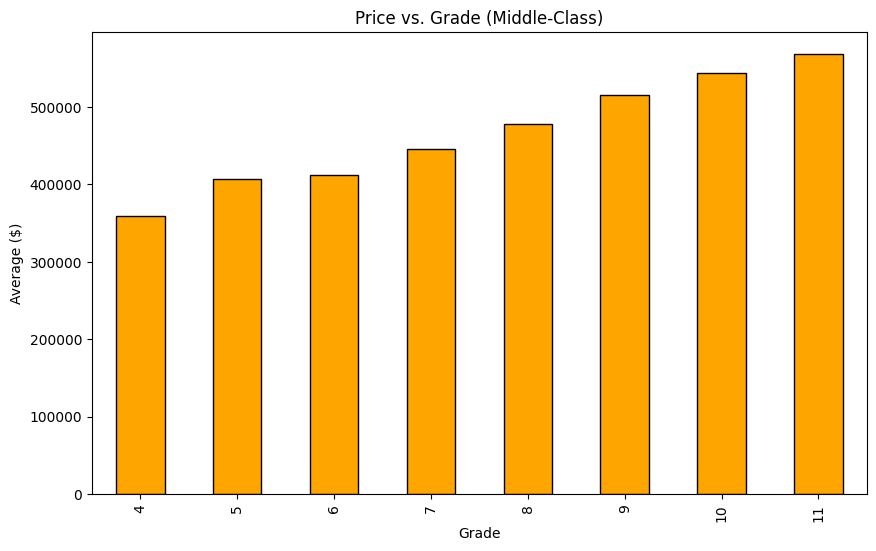

In [77]:
# Visualisation
ax = grade_price['AVG'].plot(kind='bar', title='Price vs. Grade (Middle-Class)',
                                        figsize=(10, 6), color='orange', edgecolor='black')
ax.set_xlabel('Grade')
ax.set_ylabel('Average ($)')

In [78]:
# Korrelation: Grade vs Price
corr = df_middle['grade'].corr(df_middle['price'])
print(f"Korrelation Grade <-> Price: {corr:.3f}")


Korrelation Grade <-> Price: 0.297


In [79]:
# Price vs Condition
condition_price = df_middle.groupby('condition')['price'].agg(['mean', 'count'])
condition_price.columns = ['AVG', 'Count']
condition_price

,AVG,Count
condition,,
1,450345.000000,10
2,436788.481481,54
3,459998.926200,7290
4,464268.516105,2732
5,477035.041611,745


---
## 6. Recommendations for Bonnie Brown

### RECOMMENDATION 1: Timing
**Sell in Spring/Summer**
- Higher average prices during warmer months
- Increased buyer activity

### RECOMMENDATION 2: Neighborhood
**Focus on Top-Performing Zip Codes**
- 98075, 98119, 98105 show the best prices for middle-class areas
- Avoid neighborhoods with high competition and lower prices

### RECOMMENDATION 3: Presentation
**Improve Grade if Possible**
- Strong correlation between grade and price
- Small upgrades can significantly increase the sale price


---
## 7. Selection of the 3 Best Properties

Criteria for Bonnie Brown:
1. Middle-class price range
2. of those: best prices (top-performing zip codes)
3. High grade (>=7)
4. Listed/sold during the optimal period

In [81]:
# Top Zipcodes für Middle-Class
top_zips = zip_analysis.head(5).index.tolist()
print(f"Top 5 Zipcodes: {top_zips}")

Top 5 Zipcodes: [98004, 98040, 98075, 98005, 98119]


In [85]:
# best ones
best_objects = df_middle[
    (df_middle['zipcode'].isin(top_zips)) &
    (df_middle['grade'] >= 7) &
    (df_middle['month'].isin([4, 5, 6, 7]))  # Frühling/Sommer
].sort_values('price', ascending=False)

print(f"found top objects: {len(best_objects)}")

found top objects: 91


In [ ]:
# of those: Top 3 objects
top3 = best_objects.head(3)[['price', 'zipcode', 'date', 'grade', 'condition', 
                              'sqft_living', 'bedrooms', 'bathrooms', 'price_per_sqft']]
top3

,price,zipcode,date,grade,condition,sqft_living,bedrooms,bathrooms,price_per_sqft
2647,645000.0,98075,2014-07-08,9,3,2850.0,4.0,2.50,226.315789
21563,645000.0,98119,2014-05-29,9,3,1730.0,3.0,3.25,372.832370
5064,643000.0,98075,2015-04-14,8,3,2518.0,4.0,2.50,255.361398


In [84]:
# Warum diese 3?
print("=" * 50)
print("BEGRÜNDUNG FÜR TOP 3 OBJEKTE")
print("=" * 50)
for i, (idx, row) in enumerate(top3.iterrows(), 1):
    print(f"\n🏠 OBJEKT {i}:")
    print(f"   Preis: ${row['price']:,.0f}")
    print(f"   Zipcode: {row['zipcode']} (Top Neighborhood)")
    print(f"   Verkauft: {row['date'].strftime('%B %Y')} (optimaler Zeitpunkt)")
    print(f"   Grade: {row['grade']} (gute Qualität)")
    print(f"   Größe: {row['sqft_living']:.0f} sqft, {row['bedrooms']:.0f} BR, {row['bathrooms']:.0f} BA")
    print(f"   Preis/sqft: ${row['price_per_sqft']:.0f}")

BEGRÜNDUNG FÜR TOP 3 OBJEKTE

🏠 OBJEKT 1:
   Preis: $645,000
   Zipcode: 98075 (Top Neighborhood)
   Verkauft: July 2014 (optimaler Zeitpunkt)
   Grade: 9 (gute Qualität)
   Größe: 2850 sqft, 4 BR, 2 BA
   Preis/sqft: $226

🏠 OBJEKT 2:
   Preis: $645,000
   Zipcode: 98119 (Top Neighborhood)
   Verkauft: May 2014 (optimaler Zeitpunkt)
   Grade: 9 (gute Qualität)
   Größe: 1730 sqft, 3 BR, 3 BA
   Preis/sqft: $373

🏠 OBJEKT 3:
   Preis: $643,000
   Zipcode: 98075 (Top Neighborhood)
   Verkauft: April 2015 (optimaler Zeitpunkt)
   Grade: 8 (gute Qualität)
   Größe: 2518 sqft, 4 BR, 2 BA
   Preis/sqft: $255


---
## 8. Zusammenfassung für Präsentation

### 3 Key Insights:

1. **TIMING:** Frühling/Sommer zeigt höhere Verkaufspreise

2. **GEOGRAPHISCH:** Zipcodes 98075, 98119, 98105 performen am besten für Middle-Class

3. **QUALITÄT:** Grade hat starke Korrelation mit Preis - Qualitätsverbesserungen lohnen sich

### 3 Recommendations für Bonnie Brown:

1. **Verkaufe im Frühling/Sommer** - Höchste Marktaktivität und beste Preise

2. **Positioniere dein Haus in der richtigen Price-Range** - Middle-Class Sweet Spot: $322K - $645K

3. **Investiere in Grade-Verbesserungen** - Kleine Updates können signifikanten ROI bringen